In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ecb_al = pd.read_csv('raw data/ECB_Assets_liabilities.csv')
ecb_al['DATE'] = pd.to_datetime(ecb_al['DATE'])
ecb_al.drop(['TIME PERIOD'], axis=1, inplace=True)
ecb_al.rename(columns = {"DATE": "date", "Total Assets/Liabilities reported by the ECB (stocks) (BSI.M.4F.N.N.T00.A.1.Z5.0000.Z01.E)":"ECB_assets"}, inplace=True)

last_known_row = ecb_al[ecb_al['date'] <= pd.to_datetime('01/01/2008')].iloc[-1]
new_row = last_known_row.copy()
new_row['date'] = pd.to_datetime('01/01/2008')
ecb_al.loc[len(ecb_al)] = new_row
ecb_al = ecb_al[ecb_al['date'] >= '2008-01-01']
ecb_al = ecb_al.sort_values('date')

print(ecb_al.head())
print(ecb_al.dtypes)

          date  ECB_assets
310 2008-01-01    254025.0
108 2008-01-31    281242.0
109 2008-02-29    280272.0
110 2008-03-31    286875.0
111 2008-04-30    299684.0
date          datetime64[ns]
ECB_assets           float64
dtype: object


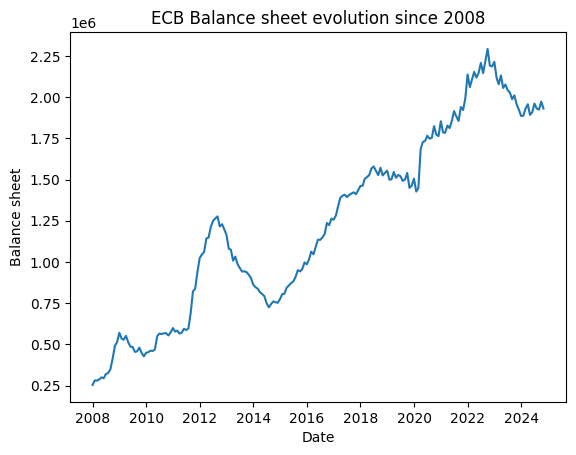

In [3]:
plt.plot(ecb_al['date'], ecb_al['ECB_assets'])
plt.title('ECB Balance sheet evolution since 2008')
plt.xlabel('Date')
plt.ylabel('Balance sheet')
plt.show()


In [4]:
ecb_release = pd.read_csv('raw data/ECB_release.csv')
ecb_release.head()
ecb_release['Date'] = pd.to_datetime(ecb_release['Date'])
ecb_release.columns = 'date', 'ECB_release'

additional_dates = pd.to_datetime(['2019-09-12', '2020-03-18', '2023-02-02'])
ecb_release.loc[(ecb_release['ECB_release'] == 0) & (ecb_release['date'].isin(additional_dates)), 'ECB_release'] = 1

ecb_release.dtypes

date           datetime64[ns]
ECB_release             int64
dtype: object

In [5]:
eurostoxx = pd.read_csv('raw data/Euro Stoxx 50.csv')
eurostoxx.head()
eurostoxx = eurostoxx[['Date', 'Change %']]
eurostoxx.columns = ['date', 'eurostoxx_change']
print(eurostoxx.head())
eurostoxx['date'] = pd.to_datetime(eurostoxx['date'])

         date eurostoxx_change
0  01/10/2025           -0.82%
1  01/09/2025            0.43%
2  01/08/2025           -0.31%
3  01/07/2025            0.50%
4  01/06/2025            2.36%


In [6]:
Bund10y = pd.read_csv('raw data/10Y Bund.csv')
Bund10y.head()
Bund10y = Bund10y[['Date', 'Change %']]
Bund10y.columns = ['date', 'Bund10y_change']
Bund10y['date'] = pd.to_datetime(Bund10y['date'])
Bund10y.head()

,date,Bund10y_change
0,2025-01-10,1.44%
1,2025-01-09,0.28%
2,2025-01-08,1.55%
3,2025-01-07,1.55%
4,2025-01-06,0.95%


In [7]:
print('eurostox \n', eurostoxx.dtypes, '\n ecb_release\n', ecb_release.dtypes, '\n Bund10y\n', Bund10y.dtypes)

eurostox 
 date                datetime64[ns]
eurostoxx_change            object
dtype: object 
 ecb_release
 date           datetime64[ns]
ECB_release             int64
dtype: object 
 Bund10y
 date              datetime64[ns]
Bund10y_change            object
dtype: object


In [8]:
print(ecb_release.columns)
print(eurostoxx.columns)
print(Bund10y.columns)

print(ecb_release['date'].dtype)
print(eurostoxx['date'].dtype)
print(Bund10y['date'].dtype)

Index(['date', 'ECB_release'], dtype='object')
Index(['date', 'eurostoxx_change'], dtype='object')
Index(['date', 'Bund10y_change'], dtype='object')
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [9]:
 #Merging eurostox, ecb_release and Bund10y
df = pd.merge(ecb_release, eurostoxx, on='date', how='inner')
df = pd.merge(df, Bund10y, on='date', how='inner')
df.head()

,date,ECB_release,eurostoxx_change,Bund10y_change
0,2011-08-15,0,-16.97%,-0.39%
1,2011-08-16,0,-0.03%,-0.17%
2,2011-08-17,0,0.32%,-3.71%
3,2011-08-18,0,-5.34%,-6.80%
4,2011-08-19,0,-2.15%,0.77%


In [10]:
filtered_df = df[df['ECB_release'] == 1][['date', 'eurostoxx_change', 'Bund10y_change']]
filtered_df.columns = ['Date', 'Eurostoxx 50 response', 'Bund 10Y response (price)']
filtered_df.set_index('Date', inplace=True)
# Display the filtered DataFrame
print(filtered_df)

           Eurostoxx 50 response Bund 10Y response (price)
Date                                                      
2011-10-06                 3.18%                     5.54%
2011-12-08                -2.43%                    -0.53%
2014-06-05                 0.90%                    -1.39%
2014-09-04                 1.81%                     0.84%
2014-10-02                -2.77%                     0.88%
2015-01-22                 1.62%                   -12.52%
2015-03-05                 0.97%                    -6.04%
2015-09-03                 2.23%                    -8.05%
2016-03-10                -1.51%                    24.79%
2016-04-21                 0.29%                    55.33%
2016-06-02                -0.16%                   -16.42%
2016-12-08                 1.39%                    10.72%
2017-10-26                 1.27%                   -13.31%
2019-09-12                 0.63%                    -6.60%
2020-03-18                -5.72%                   -46.7

In [11]:
us_treasury = pd.read_csv('raw data/10Y UStreasury.csv')
us_treasury.columns = 'date', 'US 10Y Treasury rate'
us_treasury['date'] = pd.to_datetime(us_treasury['date'])
us_treasury['% change'] = us_treasury['US 10Y Treasury rate'].pct_change() * 100 
us_treasury.head()

C:\Users\mathi\AppData\Local\Temp\ipykernel_54036\3827994021.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  us_treasury['% change'] = us_treasury['US 10Y Treasury rate'].pct_change() * 100


,date,US 10Y Treasury rate,% change
0,2008-01-02,1.59,NaN
1,2008-01-03,1.58,-0.628931
2,2008-01-04,1.56,-1.265823
3,2008-01-07,1.57,0.641026
4,2008-01-08,1.57,0.000000


In [ ]:
sp500 = pd.read_csv('raw data/S&P 500.csv')
sp500 = sp500[['Date', 'Change %']]
sp500.columns = ['date', 'SP500_change']
sp500['date'] = pd.to_datetime(sp500['date'])
sp500.head()

,date,SP500_change
0,2025-01-10,-1.54%
1,2025-01-08,0.16%
2,2025-01-07,-1.11%
3,2025-01-06,0.55%
4,2025-01-03,1.26%


In [13]:
fed_release = pd.read_csv('raw data/FED_release.csv')
fed_release['Date'] = pd.to_datetime(fed_release['Date'])
fed_release.columns = 'date', 'FED_release'

additional_dates = pd.to_datetime(['2014-09-17', '2015-12-16'])
fed_release.loc[(fed_release['FED_release'] == 0) & (fed_release['date'].isin(additional_dates)), 'FED_release'] = 1

fed_release.head()

,date,FED_release
0,2008-01-01,0
1,2008-01-02,0
2,2008-01-03,0
3,2008-01-04,0
4,2008-01-05,0


In [14]:
#merging us_treasury,  fed_release and sp500
df2 = pd.merge(fed_release, us_treasury, on='date', how='inner')
df2 = pd.merge(df2, sp500, on='date', how='inner')
df2.head()

,date,FED_release,US 10Y Treasury rate,% change,SP500_change
0,2008-01-02,0,1.59,NaN,-1.44%
1,2008-01-03,0,1.58,-0.628931,0.00%
2,2008-01-04,0,1.56,-1.265823,-2.46%
3,2008-01-07,0,1.57,0.641026,0.33%
4,2008-01-08,0,1.57,0.000000,-1.84%


In [18]:
filtered_df_2 = df2[df2['FED_release'] == 1][['date', '% change', 'SP500_change']]
filtered_df_2.columns = ['date', 'US 10Y yield change', 'SP500 response']
filtered_df_2['US 10Y yield change'] = filtered_df_2['US 10Y yield change'].round(1)
filtered_df_2['SP500 response'] = filtered_df_2['SP500 response'].round(0)
filtered_df_2.set_index('date', inplace=True)
print(filtered_df_2)

            US 10Y yield change SP500 response
date                                          
2008-11-25                -10.3          0.66%
2008-12-01                 -8.5         -8.93%
2008-12-16                 -9.1          5.13%
2009-01-28                  2.3          3.36%
2009-03-18                -32.6          2.09%
2010-08-27                 10.5          1.66%
2010-09-21                -17.0         -0.25%
2010-10-12                  8.9          0.39%
2010-10-15                 22.0          0.20%
2010-11-03                  2.0          0.37%
2011-08-26                 15.4          1.51%
2012-08-22                 22.2          0.02%
2012-09-13                 18.0          1.63%
2012-12-12                 -6.0          0.05%
2014-09-17                 16.7          0.13%
2015-12-16                  5.0          1.45%
